In [ ]:
import pandas as pd
import re

# Load datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Function to convert age strings to buckets directly
def bucket_age(age_str):
    """Convert age strings (e.g., '2 years', '4 weeks') into age buckets."""
    if pd.isna(age_str):  # Handle missing values
        return "Unknown"

    age_str = age_str.lower().strip()
    conversion = {"year": 365, "month": 30, "week": 7, "day": 1}

    match = re.match(r"(\d+)\s*(year|month|week|day)s?", age_str)
    if match:
        num = int(match.group(1))
        unit = match.group(2)
        days = num * conversion[unit]  # Convert age to days

        # Assign age bucket
        if days <= 180:
            return "Baby"
        elif 181 <= days <= 730:
            return "Child"
        elif 1096 <= days < 4015:
            return "Adult"
        elif days >= 4015:
            return "Senior"

    return "Unknown"  # For unexpected formats

# Apply bucketing directly
train_df["Age Bucket"] = train_df["Age upon Intake"].apply(bucket_age)

# Drop unnecessary columns (not present in test set)
train_df.drop(columns=['Name', 'Id', 'Intake Time', 'Outcome Time', 'Age upon Intake', 'Date of Birth'], inplace=True)

# Bucket Found in Travis/Austin vs not and check correl

In [ ]:
# Create a new column: 1 if "Austin" or "Travis" is in "Found Location", otherwise 0
train_df["Is Austin/Travis"] = train_df["Found Location"].str.contains("Austin|Travis", case=False, na=False).astype(int)

# Drop the original "Found Location" column
train_df.drop(columns=["Found Location"], inplace=True)

# Verify the changes
print(train_df.head())  # Check the first few rows
print(train_df["Is Austin/Travis"].value_counts())  # Check distribution


       Intake Type Intake Condition Animal Type Sex upon Intake  \
0            Stray           Normal         Dog   Spayed Female   
1            Stray           Normal         Dog     Intact Male   
2    Public Assist           Normal         Cat   Neutered Male   
3  Owner Surrender           Normal         Dog   Neutered Male   
4    Public Assist           Normal         Dog   Neutered Male   

                      Breed         Color     Outcome Type Age Bucket  \
0  English Springer Spaniel   White/Liver  Return to Owner      Adult   
1               Basenji Mix   Sable/White  Return to Owner      Child   
2        Domestic Shorthair  Orange Tabby         Transfer      Child   
3    Labrador Retriever Mix     Chocolate  Return to Owner      Child   
4            Great Dane Mix         Black  Return to Owner      Adult   

   Is Austin/Travis  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  
Is Austin/Travis
1    1033

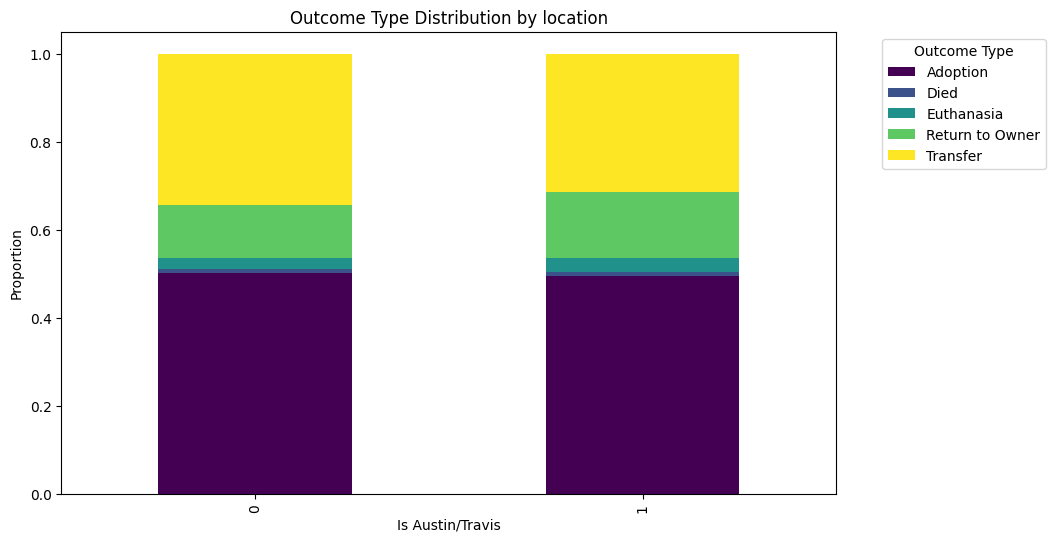

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the crosstab of Intake Type vs. Outcome Type
location_counts = pd.crosstab(train_df["Is Austin/Travis"], train_df["Outcome Type"], normalize="index")


# Plot the stacked bar chart
location_counts.plot(kind="bar", stacked=True, colormap="viridis", figsize=(10,6))
plt.title("Outcome Type Distribution by location")
plt.ylabel("Proportion")
plt.xlabel("Is Austin/Travis")
plt.legend(title="Outcome Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# As seen above not hugely correlated so get rid of this

In [ ]:
train_df.drop(columns=["Is Austin/Travis"], inplace=True)


# Bucket mix and pure breed

In [ ]:
train_df["Is Mixed Breed"] = train_df["Breed"].str.contains("Mix", case=False, na=False).astype(int)

# Verify that the column was added
print(train_df.head())  # Check the first few rows


       Intake Type Intake Condition Animal Type Sex upon Intake  \
0            Stray           Normal         Dog   Spayed Female   
1            Stray           Normal         Dog     Intact Male   
2    Public Assist           Normal         Cat   Neutered Male   
3  Owner Surrender           Normal         Dog   Neutered Male   
4    Public Assist           Normal         Dog   Neutered Male   

                      Breed         Color     Outcome Type Age Bucket  \
0  English Springer Spaniel   White/Liver  Return to Owner      Adult   
1               Basenji Mix   Sable/White  Return to Owner      Child   
2        Domestic Shorthair  Orange Tabby         Transfer      Child   
3    Labrador Retriever Mix     Chocolate  Return to Owner      Child   
4            Great Dane Mix         Black  Return to Owner      Adult   

   Is Mixed Breed  
0               0  
1               1  
2               0  
3               1  
4               1  


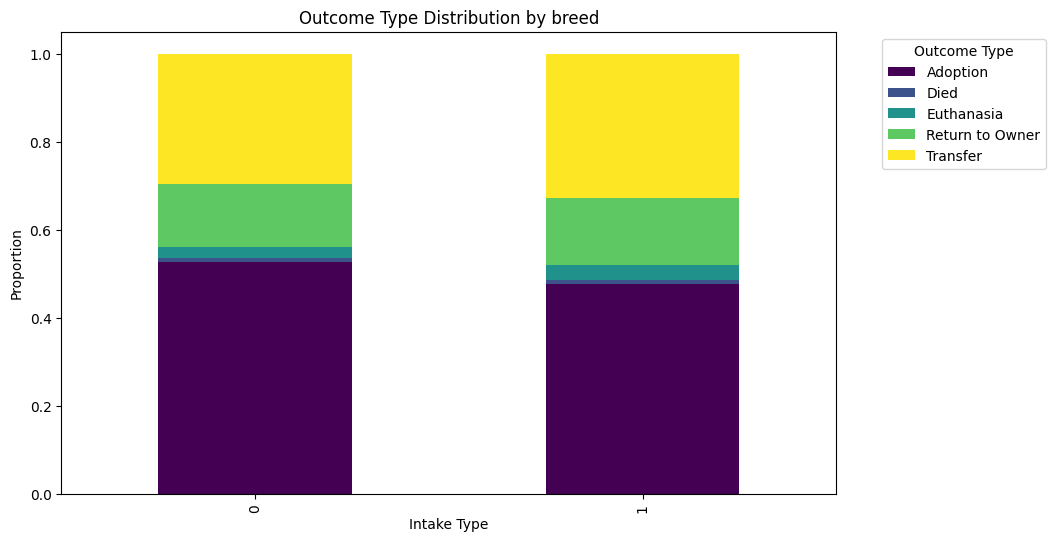

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the crosstab of Intake Type vs. Outcome Type
breed_counts = pd.crosstab(train_df["Is Mixed Breed"], train_df["Outcome Type"], normalize="index")

# Plot the stacked bar chart
breed_counts.plot(kind="bar", stacked=True, colormap="viridis", figsize=(10,6))
plt.title("Outcome Type Distribution by breed")
plt.ylabel("Proportion")
plt.xlabel("Intake Type")
plt.legend(title="Outcome Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# As seen above not a huge diff between mixed and pure preed distributions, could probably drop this col

In [ ]:
train_df.drop(columns=["Is Mixed Breed", "Breed"], inplace=True)

# Correl btwn age and outcome

since unknowns seem to be pretty evenly distributed i feel like we should drop those

Outcome Type  Adoption      Died  Euthanasia  Return to Owner  Transfer
Age Bucket                                                             
Adult         0.357935  0.006330    0.053185         0.341686  0.240864
Baby          0.580793  0.014275    0.019916         0.027389  0.357627
Child         0.473112  0.004556    0.028547         0.186480  0.307305
Senior        0.231007  0.013063    0.117566         0.442420  0.195944
Unknown       0.410778  0.005475    0.039350         0.282293  0.262104


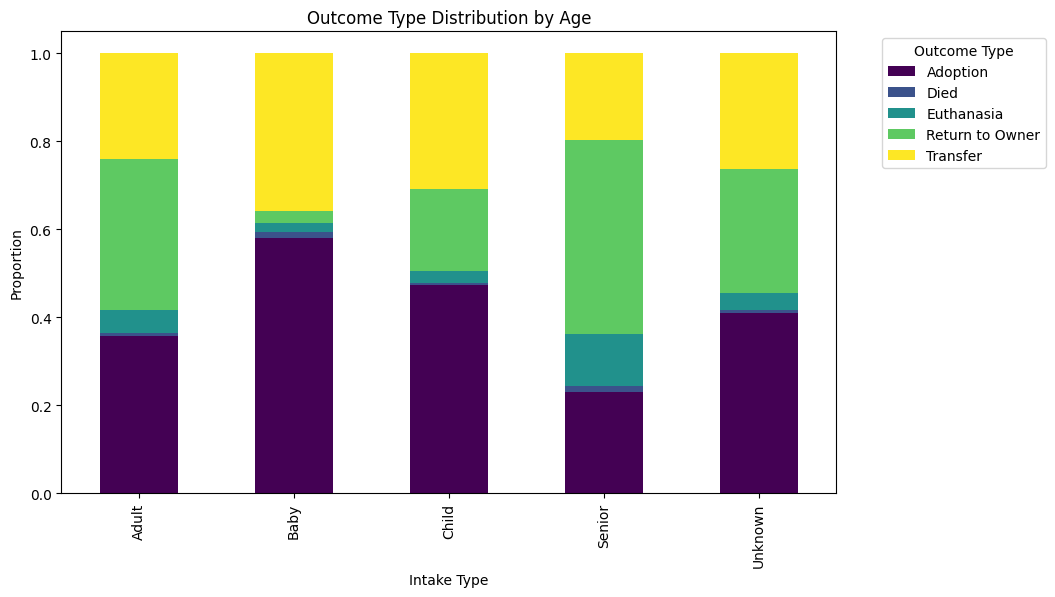

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the crosstab of Intake Type vs. Outcome Type
age_counts = pd.crosstab(train_df["Age Bucket"], train_df["Outcome Type"], normalize="index")
print(age_counts)


# Plot the stacked bar chart
age_counts.plot(kind="bar", stacked=True, colormap="viridis", figsize=(10,6))
plt.title("Outcome Type Distribution by Age")
plt.ylabel("Proportion")
plt.xlabel("Intake Type")
plt.legend(title="Outcome Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


# Getting rid of unknowns bc not that many + evenly distrib among outcome

In [ ]:
unknown_count = train_df[train_df["Age Bucket"] == "Unknown"].shape[0]
print(f"Number of 'Unknown' Age Buckets: {unknown_count}")

train_df = train_df[train_df["Age Bucket"] != "Unknown"].reset_index(drop=True)


Number of 'Unknown' Age Buckets: 5845


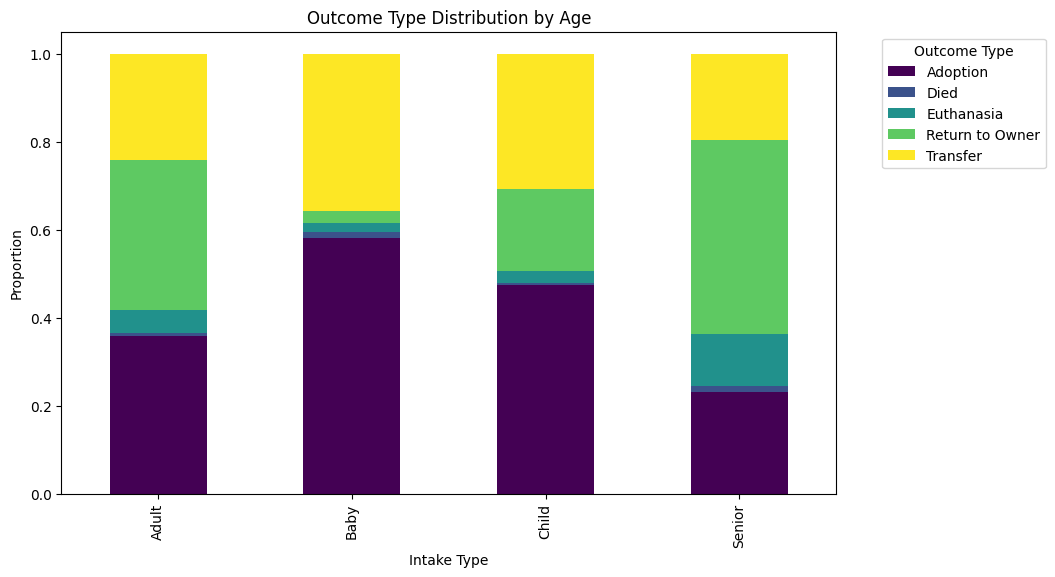

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the crosstab of Intake Type vs. Outcome Type
age_counts = pd.crosstab(train_df["Age Bucket"], train_df["Outcome Type"], normalize="index")

# Plot the stacked bar chart
age_counts.plot(kind="bar", stacked=True, colormap="viridis", figsize=(10,6))
plt.title("Outcome Type Distribution by Age")
plt.ylabel("Proportion")
plt.xlabel("Intake Type")
plt.legend(title="Outcome Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


## **Correlation between Intake Type and Outcome Type**
---
There seems to be a high correl btwn euthanasia requests & euthanasia's

Also high correl btwn public assist and return to owner

all wildlife animals got returned to owner?

could be a class imabalance issue with how many adoptions we're seeing




Outcome Type        Adoption      Died  Euthanasia  Return to Owner  Transfer
Intake Type                                                                  
Abandoned           0.629347  0.004241    0.005937         0.088210  0.272265
Euthanasia Request  0.046243  0.017341    0.780347         0.040462  0.115607
Owner Surrender     0.650478  0.007102    0.026859         0.051368  0.264192
Public Assist       0.188353  0.004732    0.031301         0.631119  0.144495
Stray               0.482382  0.010615    0.030177         0.131794  0.345032
Wildlife            0.000000  0.000000    0.000000         1.000000  0.000000


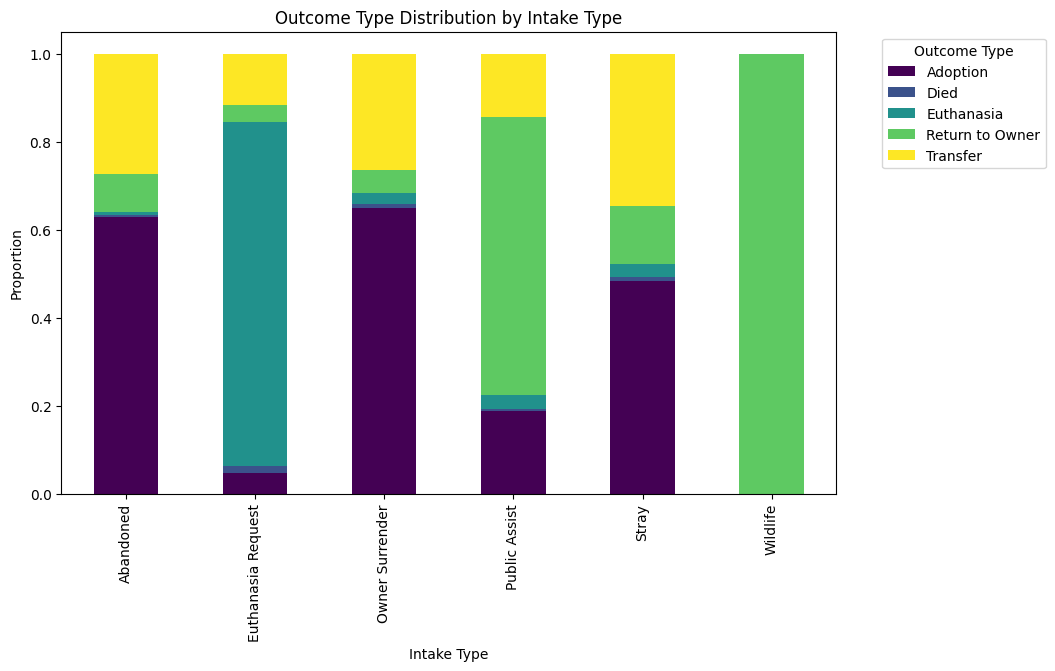

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the crosstab of Intake Type vs. Outcome Type
intake_outcome_counts = pd.crosstab(train_df["Intake Type"], train_df["Outcome Type"], normalize="index")

print(intake_outcome_counts)

# Plot the stacked bar chart
intake_outcome_counts.plot(kind="bar", stacked=True, colormap="viridis", figsize=(10,6))
plt.title("Outcome Type Distribution by Intake Type")
plt.ylabel("Proportion")
plt.xlabel("Intake Type")
plt.legend(title="Outcome Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


## **Correlation between intake type vs outcome type**


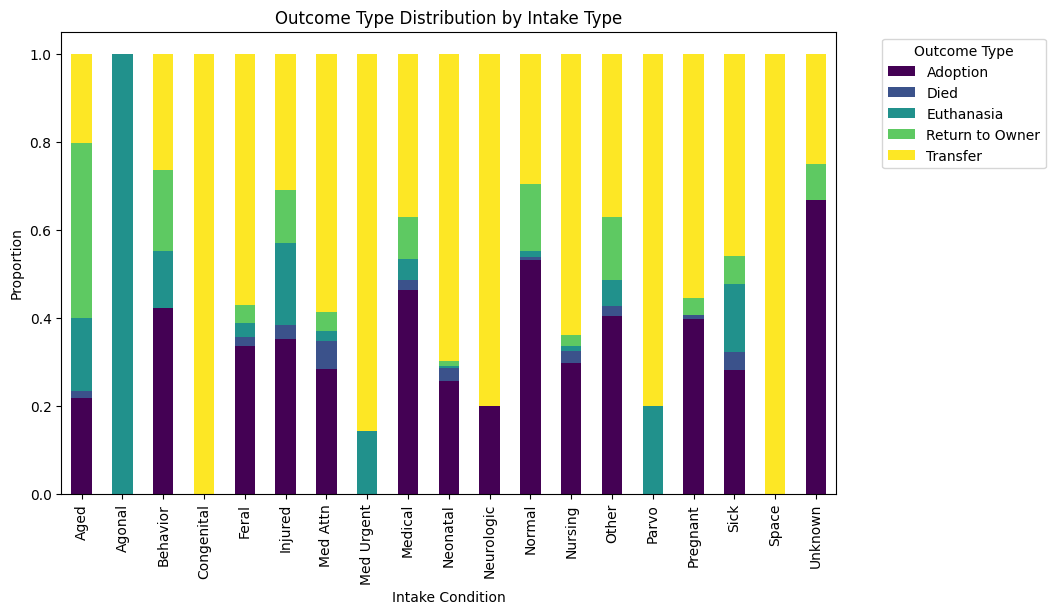

Outcome Type      Adoption  Died  Euthanasia  Return to Owner  Transfer
Intake Condition                                                       
Aged                    81     6          62              148        76
Agonal                   0     0           1                0         0
Behavior                16     0           5                7        10
Congenital               0     0           0                0         1
Feral                   33     2           3                4        56
Injured               2074   189        1111              717      1826
Med Attn                13     3           1                2        27
Med Urgent               0     0           1                0         6
Medical                126     6          13               26       101
Neonatal               317    38           6               12       867
Neurologic               2     0           0                0         8
Normal               47806   506        1327            13657   

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the crosstab of Intake Type vs. Outcome Type
intake_type_outcome_counts = pd.crosstab(train_df["Intake Condition"], train_df["Outcome Type"], normalize="index")

# Plot the stacked bar chart
intake_type_outcome_counts.plot(kind="bar", stacked=True, colormap="viridis", figsize=(10,6))
plt.title("Outcome Type Distribution by Intake Type")
plt.ylabel("Proportion")
plt.xlabel("Intake Condition")
plt.legend(title="Outcome Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

import pandas as pd
import scipy.stats as stats
import numpy as np

# Compute contingency table (raw counts)
contingency_table = pd.crosstab(train_df["Intake Condition"], train_df["Outcome Type"])

print(contingency_table)

# Compute row-wise percentages
contingency_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Perform Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Compute Cramér's V
n = contingency_table.sum().sum()  # Total number of observations
phi2 = chi2_stat / n
r, k = contingency_table.shape
cramers_v = np.sqrt(phi2 / min(r-1, k-1))

# Print results
print("=== Contingency Table (Raw Counts) ===")
print(contingency_table)

print("\n=== Contingency Table (Percentages) ===")
print(contingency_percentage.round(2))

print("\n=== Chi-Square Test Results ===")
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p_value:.4f}")

print("\n=== Cramér's V (Association Strength) ===")
print(f"Cramér's V: {cramers_v:.4f}")


# Correl of Sex upon Intake vs Outcome Type

it seems like most "Unknown" gets transferred

I also think more spayed/neutered animals get returned to owners more which makes sense, but its hard to tell possibly because there's overrepresentation of adoption

Outcome Type     Adoption      Died  Euthanasia  Return to Owner  Transfer
Sex upon Intake                                                           
Intact Female    0.557166  0.008749    0.024383         0.071959  0.337742
Intact Male      0.543339  0.009910    0.028054         0.104566  0.314131
Neutered Male    0.396604  0.004425    0.039829         0.357097  0.202044
Spayed Female    0.447091  0.005417    0.030541         0.326329  0.190623
Unknown          0.004773  0.040095    0.083771         0.028878  0.842482


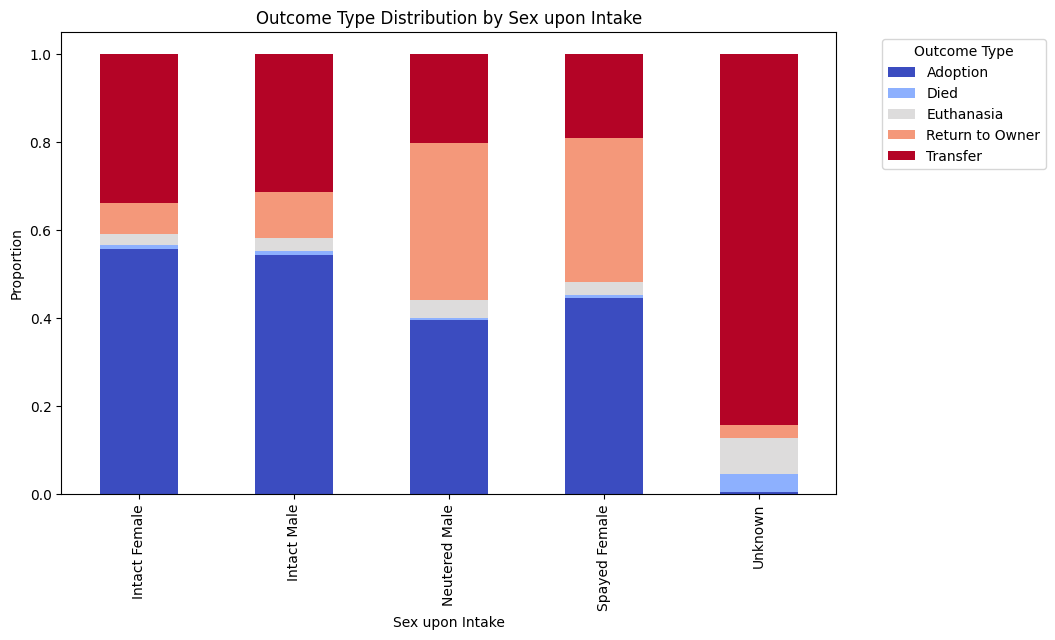

In [ ]:
import matplotlib.pyplot as plt

sex_outcome_counts = pd.crosstab(train_df["Sex upon Intake"], train_df["Outcome Type"], normalize="index")
print(sex_outcome_counts)
# Plot the stacked bar chart
sex_outcome_counts.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(10,6))
plt.title("Outcome Type Distribution by Sex upon Intake")
plt.ylabel("Proportion")
plt.xlabel("Sex upon Intake")
plt.legend(title="Outcome Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


# Correl btwn animal type and outcome

doesnt seem to be a big difference between cats and dogs, this could potentially be an irrelevant feature ?

Outcome Type  Adoption      Died  Euthanasia  Return to Owner  Transfer
Animal Type                                                            
Cat           0.502410  0.014813    0.037778         0.039578  0.405421
Dog           0.497727  0.005142    0.024448         0.228794  0.243888


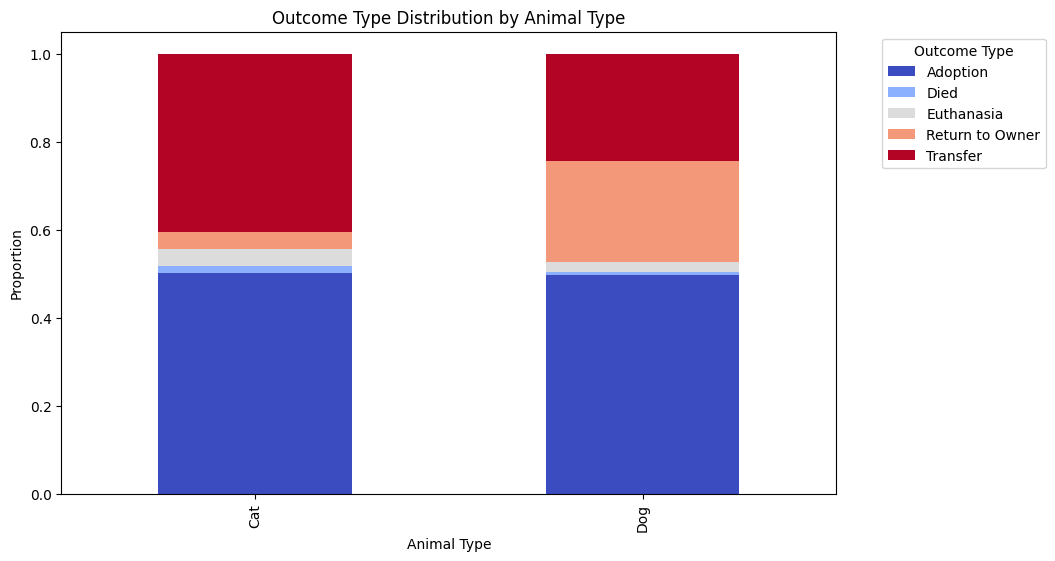

In [ ]:
import matplotlib.pyplot as plt

animal_type_outcome_counts = pd.crosstab(train_df["Animal Type"], train_df["Outcome Type"], normalize="index")

# Plot the stacked bar chart
animal_type_outcome_counts.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(10,6))
print(animal_type_outcome_counts)
plt.title("Outcome Type Distribution by Animal Type")
plt.ylabel("Proportion")
plt.xlabel("Animal Type")
plt.legend(title="Outcome Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# Correl btwn color and outcome type

this is kinda crazy, another irrelevant feature potentially

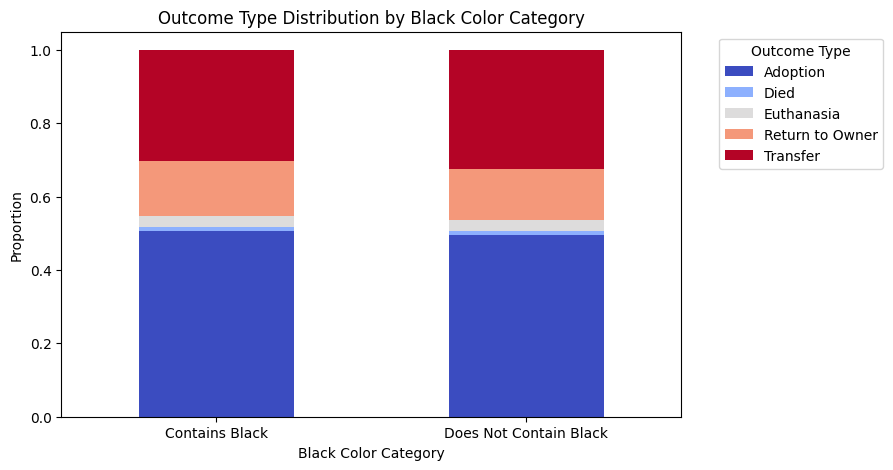

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a new column categorizing animals by whether their color contains "Black"
train_df["Black Category"] = train_df["Color"].apply(lambda x: "Contains Black" if "Black" in x else "Does Not Contain Black")

# Compute proportions of outcome types within each color category
black_outcome_counts = pd.crosstab(train_df["Black Category"], train_df["Outcome Type"], normalize="index")

# Plot the stacked bar chart
black_outcome_counts.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(8, 5))
plt.title("Outcome Type Distribution by Black Color Category")
plt.ylabel("Proportion")
plt.xlabel("Black Color Category")
plt.legend(title="Outcome Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=0)
plt.show()


# Getting rid of color feature for now bc there r so many


In [ ]:
train_df.drop(columns=['Color'], inplace=True)

# Now want to try UNDERSAMPLING majority classes and checking correlations

In [ ]:
import pandas as pd
from sklearn.utils import resample

# Separate the classes
adopted = train_df[train_df["Outcome Type"] == "Adoption"]
transferred = train_df[train_df["Outcome Type"] == "Transfer"]
euthanasia = train_df[train_df["Outcome Type"] == "Euthanasia"]
return_to_owner = train_df[train_df["Outcome Type"] == "Return to Owner"]
died = train_df[train_df["Outcome Type"] == "Died"]

# Combine minority classes
minority_class = pd.concat([euthanasia, return_to_owner, died])

# Check the size of each class
print(f"Adopted: {len(adopted)}")
print(f"Transferred: {len(transferred)}")
print(f"Minority Classes (Euthanasia, Return to Owner, Died): {len(minority_class)}")

# Undersample the majority classes (Adopted and Transferred) to match the minority class size
target_size = len(minority_class)

# Perform undersampling on the majority classes
adopted_undersampled = resample(adopted,
                                replace=False,    # Don't sample with replacement
                                n_samples=target_size,  # Match minority class size
                                random_state=42)  # Reproducibility

transferred_undersampled = resample(transferred,
                                    replace=False,
                                    n_samples=target_size,
                                    random_state=42)

# Combine the resampled data back into one balanced dataset
balanced_train_df = pd.concat([adopted_undersampled, transferred_undersampled, minority_class])

# Check the class distribution of the balanced dataset
print("\nClass distribution after undersampling:")
print(balanced_train_df["Outcome Type"].value_counts())

# Optionally, shuffle the dataset to mix the classes
# balanced_train_df = balanced_train_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Now you can proceed with training your model on this balanced dataset


Adopted: 52643
Transferred: 33492
Minority Classes (Euthanasia, Return to Owner, Died): 19177

Class distribution after undersampling:
Outcome Type
Adoption           19177
Transfer           19177
Return to Owner    14949
Euthanasia          3219
Died                1009
Name: count, dtype: int64


# AFTER UNDERSAMPLING: correl btwn Intake Type and Outcome

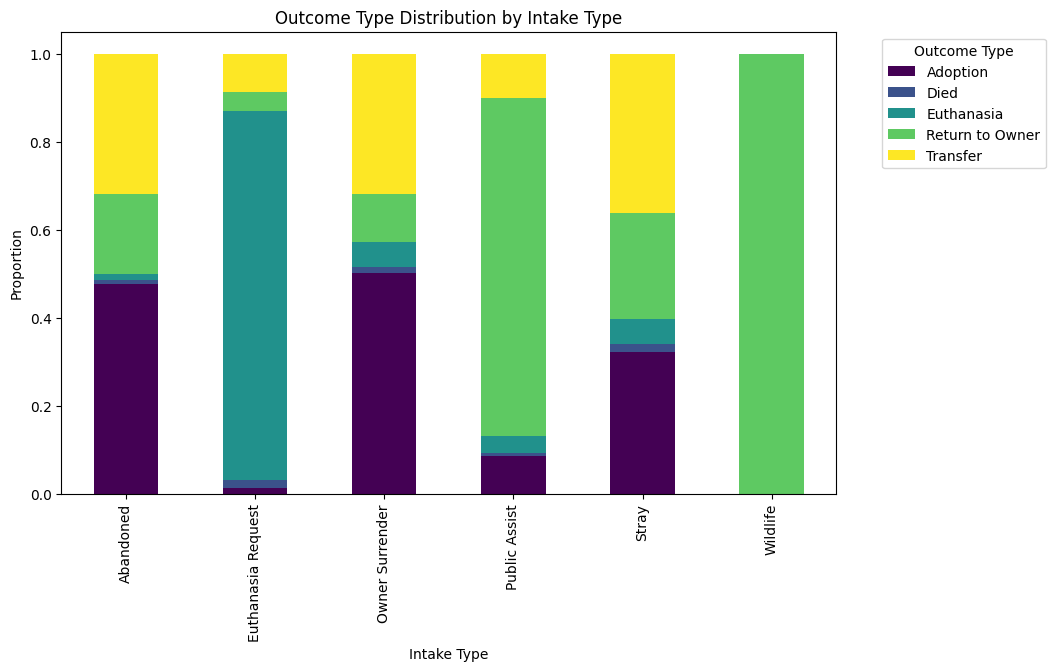

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the crosstab of Intake Type vs. Outcome Type
intake_outcome_counts = pd.crosstab(balanced_train_df["Intake Type"], balanced_train_df["Outcome Type"], normalize="index")

# Plot the stacked bar chart
intake_outcome_counts.plot(kind="bar", stacked=True, colormap="viridis", figsize=(10,6))
plt.title("Outcome Type Distribution by Intake Type")
plt.ylabel("Proportion")
plt.xlabel("Intake Type")
plt.legend(title="Outcome Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


# AFTER UNDERSAMPLING correl btwn Sex Upon Intake and outcome

compared to BEFORE undersampling, this shows that spayed/neutered animals get returned to owners more than intact males and females, i think this makes sense

unknown still gets transferred the most which I think also makes sense

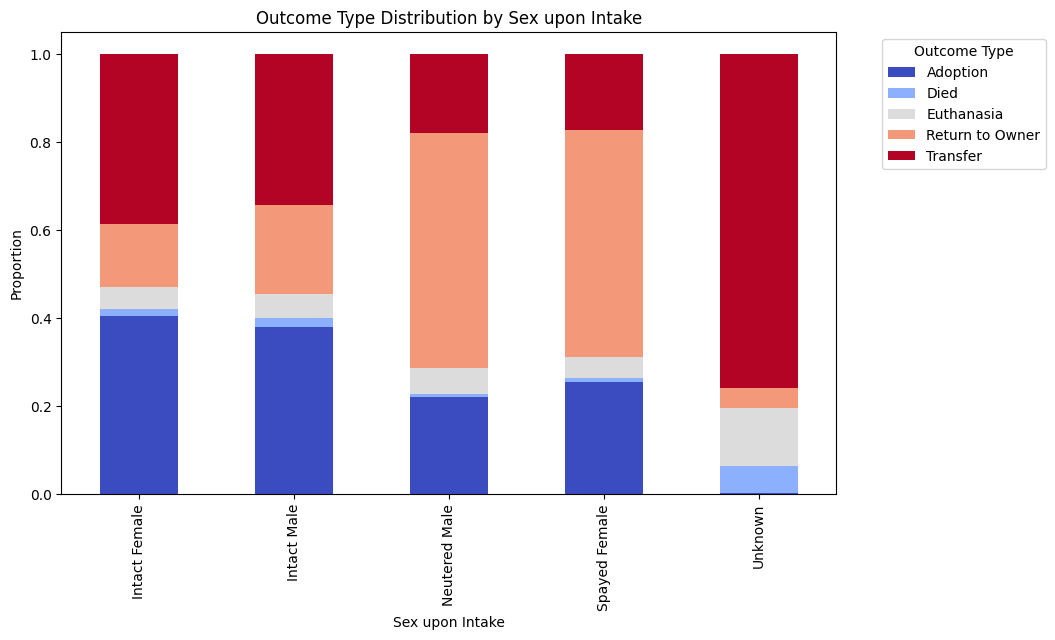

In [ ]:
import matplotlib.pyplot as plt

sex_outcome_counts = pd.crosstab(balanced_train_df["Sex upon Intake"], balanced_train_df["Outcome Type"], normalize="index")

# Plot the stacked bar chart
sex_outcome_counts.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(10,6))
plt.title("Outcome Type Distribution by Sex upon Intake")
plt.ylabel("Proportion")
plt.xlabel("Sex upon Intake")
plt.legend(title="Outcome Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [ ]:
balanced_train_df.drop(columns=["Animal Type"], inplace=True)
print(balanced_train_df.head())

           Intake Type Intake Condition Sex upon Intake Outcome Type  \
82147  Owner Surrender           Normal     Intact Male     Adoption   
55298  Owner Surrender           Normal   Intact Female     Adoption   
77414            Stray           Normal   Intact Female     Adoption   
22556            Stray           Normal     Intact Male     Adoption   
16278            Stray           Normal   Intact Female     Adoption   

      Age Bucket          Black Category  
82147       Baby  Does Not Contain Black  
55298       Baby  Does Not Contain Black  
77414       Baby  Does Not Contain Black  
22556      Child  Does Not Contain Black  
16278       Baby  Does Not Contain Black  


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply one-hot encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))

# Restore column names after encoding
X_encoded.columns = encoder.get_feature_names_out(categorical_cols)

# Drop original categorical columns and replace with encoded features
X = X.drop(columns=categorical_cols).reset_index(drop=True)
X_encoded = X_encoded.reset_index(drop=True)

# Concatenate numerical and encoded categorical features
X_final = pd.concat([X, X_encoded], axis=1)


NameError: name 'X' is not defined

# NOW train model on balanced_train_df


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define categorical columns for one-hot encoding
categorical_cols = ["Intake Type", "Intake Condition", "Animal Type", "Sex upon Intake", "Age Bucket"]

# Apply OneHotEncoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = pd.DataFrame(encoder.fit_transform(balanced_train_df[categorical_cols]))

# Restore column names after encoding
X_encoded.columns = encoder.get_feature_names_out(categorical_cols)

# Drop original categorical columns and replace with encoded features
X = balanced_train_df.drop(columns=categorical_cols + ["Outcome Type"]).reset_index(drop=True)
X_encoded = X_encoded.reset_index(drop=True)

# Concatenate numerical and encoded categorical features
X_final = pd.concat([X, X_encoded], axis=1)

# Define target variable
y = balanced_train_df["Outcome Type"]

# Split data
X_train, X_val, y_train, y_val = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Train stacking model with different max_depth values
max_depths = [3, 5, 7, 10]

for depth in max_depths:
    print(f"\nTraining Stacking Model with Random Forest (max_depth={depth})...\n")

    base_learners = [
        ('rf1', RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)),
        ('rf2', RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42, criterion='entropy'))
    ]

    stacking_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

    stacking_model.fit(X_train, y_train)

    y_pred = stacking_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)

    print(f"Accuracy with max_depth={depth}: {accuracy:.4f}")